In [1]:
import EntropyHub as EH
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

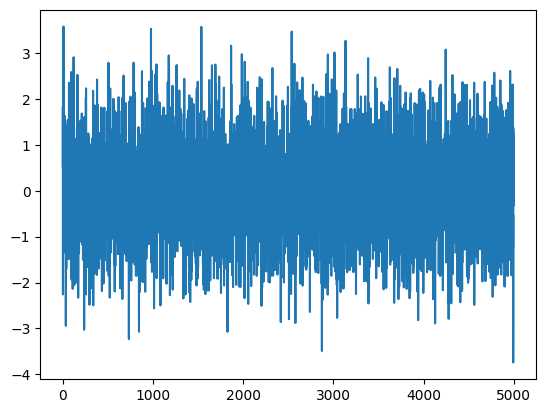

In [6]:
X = EH.ExampleData("gaussian")
plt.plot(X)

In [2]:
PICKLE_FILE_PATH_DS = '/Users/reva/Documents/Python/SE_DA_FPM/data/df_combined_SE_all_drugs.pkl'
df = pd.read_pickle(PICKLE_FILE_PATH_DS)

In [5]:
df[df["session"]=="Raclopride"]

,file,session,Ep2_timestamps,bl_rec_data,bl_rec_samplerate,bl_rec_tstart,bl_rec_tend,Epopto_timestamps
24,Lus021631_VS-220926-094459,Raclopride,"[530.6425354480743, 530.6445014476776, 625.426...","[-0.9997144937515259, -0.9997178316116333, -0....",[1017.2526245117188],[9.5367431640625e-07],[2417.931387758793],"[243.1685435771942, 243.41839957237244, 253.16..."
25,Lus021636_VS-220926-090621,Raclopride,"[427.5181987285614, 427.5203285217285, 492.976...","[-1.0000762939453125, -1.0000888109207153, -1....",[1017.2526245117188],[9.5367431640625e-07],[2147.3987797265663],"[220.44983386993408, 220.6996898651123, 230.44..."
26,Lus021829_DS-220926-110256,Raclopride,"[385.01073002815247, 385.01269602775574, 437.1...","[-0.9990139603614807, -0.9990262985229492, -0....",[1017.2526245117188],[9.5367431640625e-07],[1997.0329814916265],"[152.13019227981567, 152.3800482749939, 162.12..."
27,Lus021830_DS-220926-113745,Raclopride,"[873.311601638794, 873.3135676383972, 902.2424...","[-0.9698135852813721, -0.9699610471725464, -0....",[1017.2526245117188],[9.5367431640625e-07],[2856.320041990818],"[519.7198140621185, 519.9695062637329, 529.718..."
28,Lus021832_DS-220926-142609,Raclopride,"[477.0971658229828, 477.09913182258606, 697.07...","[-0.9976845383644104, -0.9976677298545837, -0....",[1017.2526245117188],[9.5367431640625e-07],[1958.025954342426],"[180.72748136520386, 180.97733736038208, 190.7..."
29,Lus021836_VS-220926-135113,Raclopride,"[488.83204197883606, 488.83400797843933, 553.7...","[-0.9989957213401794, -0.9989966750144958, -0....",[1017.2526245117188],[9.5367431640625e-07],[1832.4484923844946],"[239.3396029472351, 239.5892951488495, 249.338..."
30,Lus021869_VS-220926-103020,Raclopride,"[545.4594056606293, 545.4613718986511, 590.322...","[-0.9983479976654053, -0.9983485341072083, -0....",[1017.2526245117188],[9.5367431640625e-07],[1811.1833711629522],"[259.49978709220886, 259.7496430873871, 269.49..."
31,Lus021870_VS-220926-130700,Raclopride,"[1090.1603951454163, 1090.162361383438, 1156.9...","[-0.9985509514808655, -0.9985361695289612, -0....",[1017.2526245117188],[9.5367431640625e-07],[2510.6674493318214],"[183.25356650352478, 183.503422498703, 193.252..."


Text(0.5, 1.0, 'Example of DA Fentanyl in DS')

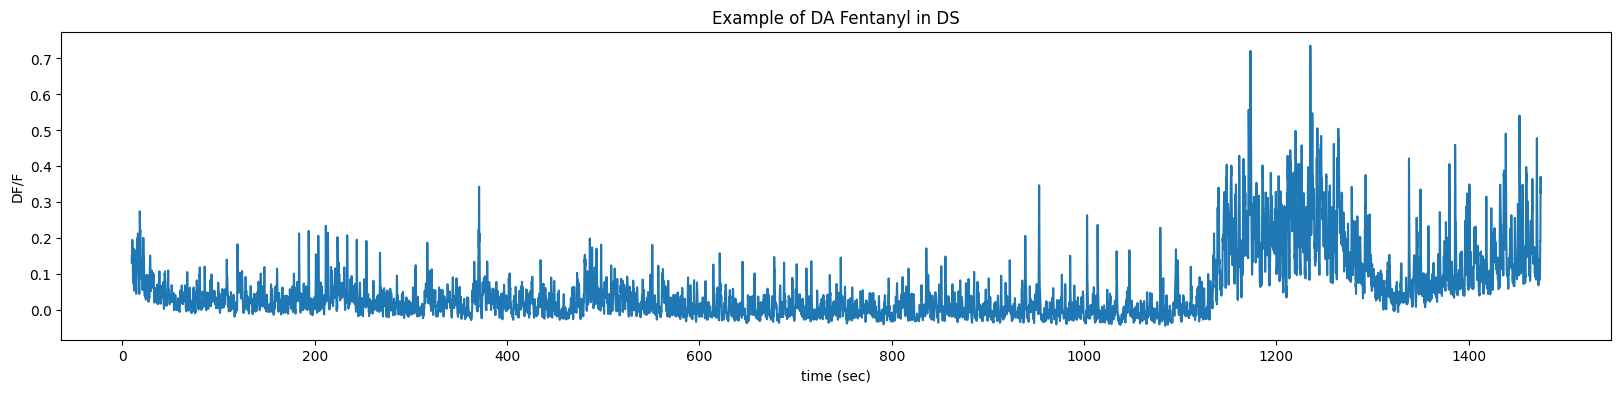

In [14]:
plt.figure(figsize=(20, 4))
time_points = np.arange(0, 1500000)
fs = 1017  # Sampling rate in Hz

# Convert time points to seconds
time_in_seconds = time_points / fs
plt.plot(time_in_seconds[10000:1500000],df["bl_rec_data"][31][10000:1500000])
plt.ylabel("DF/F")
plt.xlabel("time (sec)")
plt.title("Example of DA Fentanyl in DS")
#plt.ylim([-0.1, 0.44])

In [17]:
df['file_prefix'] = df['file'].apply(lambda x: x.split('_')[0])

# Group the signals by "file_prefix" field and concatenate signals
grouped_signals = df.groupby('file_prefix')['base_before_coc'].apply(lambda x: np.concatenate(x.values)).reset_index()
for signal_idx, row in grouped_signals.iterrows():
        signal = row['base_before_coc']
        Samp, _, _ = EH.SampEn(signal, m = 4)
        print(Samp)

array([2.17892361, 2.17574233, 2.18196957, 2.22098398, 2.17556672])

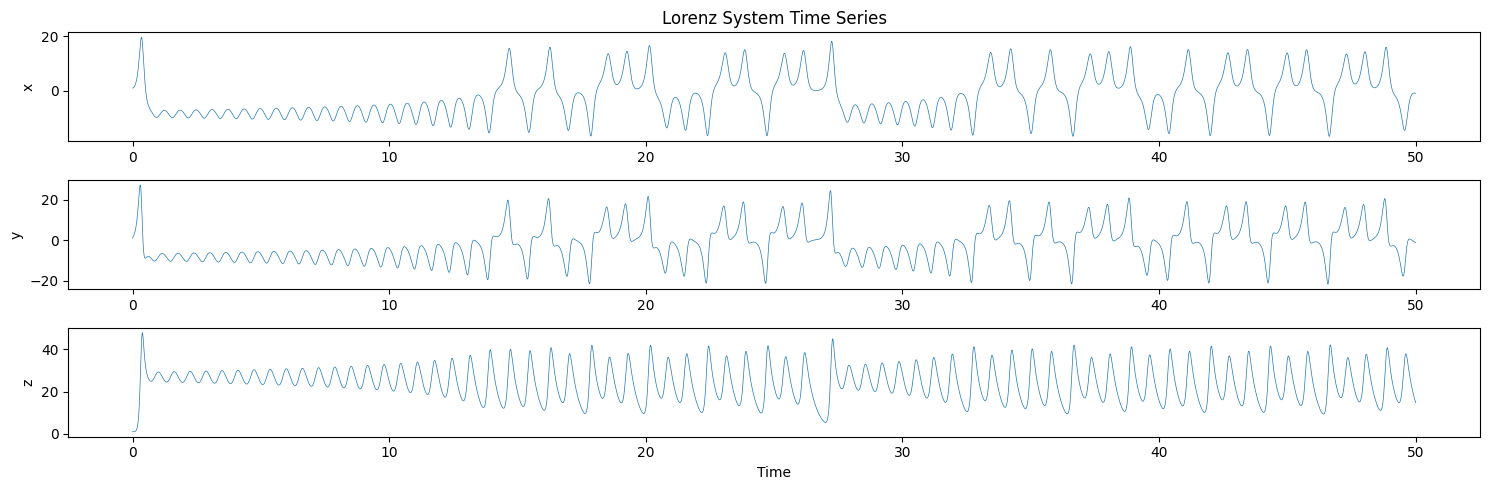

In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Lorenz system
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Lorenz system differential equations
def lorenz(t, state):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Initial state and time span
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

# Solve the Lorenz system
solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)

# Extracting the data
# Extracting the data
t = solution.t
x_lorenz = solution.y[0]
y_lorenz = solution.y[1]
z_lorenz = solution.y[2]


plt.figure(figsize=(15, 5))

plt.subplot(3, 1, 1)
plt.plot(t, x_lorenz, lw=0.5)
plt.title("Lorenz System Time Series")
plt.ylabel("x")

plt.subplot(3, 1, 2)
plt.plot(t, y_lorenz, lw=0.5)
plt.ylabel("y")

plt.subplot(3, 1, 3)
plt.plot(t, z_lorenz, lw=0.5)
plt.ylabel("z")
plt.xlabel("Time")

plt.tight_layout()
plt.show()


Fractal Dimension Before: 1.9842889481467858
Fractal Dimension After: 1.955468671996417


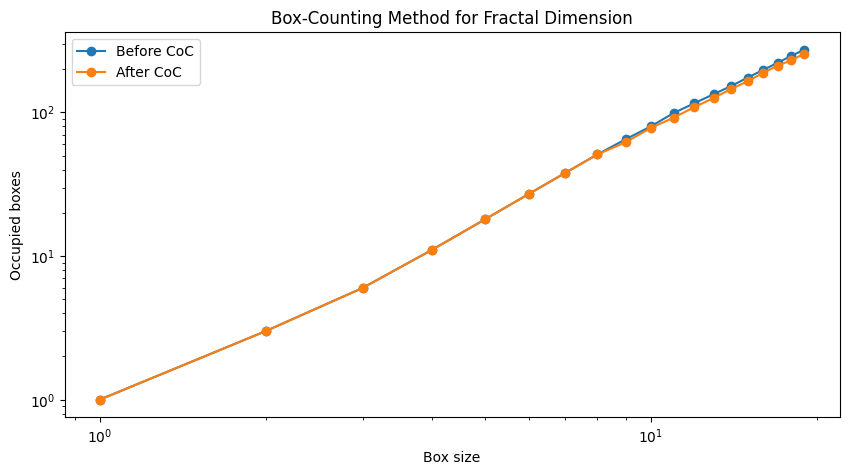

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Sample signals (replace these with your actual signals)
np.random.seed(0)
signal_before = np.sin(np.linspace(0, 20 * np.pi, 10000)) + 0.1 * np.random.randn(10000)
signal_after = np.sin(np.linspace(0, 10 * np.pi, 10000)) + 0.1 * np.random.randn(10000)  # Slower signal

# Detect peaks to identify cycles
peaks_before, _ = find_peaks(signal_before)
peaks_after, _ = find_peaks(signal_after)

# Select equal number of cycles
num_cycles = min(len(peaks_before), len(peaks_after)) - 1
selected_cycles_before = signal_before[peaks_before[0]:peaks_before[num_cycles]]
selected_cycles_after = signal_after[peaks_after[0]:peaks_after[num_cycles]]

# Calculate the velocity (numerical derivative) of the selected cycles
time_vector_before = np.linspace(0, len(selected_cycles_before) - 1, len(selected_cycles_before))
time_vector_after = np.linspace(0, len(selected_cycles_after) - 1, len(selected_cycles_after))

v_before = np.gradient(selected_cycles_before, time_vector_before)
v_after = np.gradient(selected_cycles_after, time_vector_after)

# Reconstruct phase space using displacement and velocity
phase_space_before = np.column_stack((selected_cycles_before, v_before))
phase_space_after = np.column_stack((selected_cycles_after, v_after))

# Calculate box-counting dimension
def box_counting_dimension(data, box_sizes):
    min_x, max_x = np.min(data[:, 0]), np.max(data[:, 0])
    min_y, max_y = np.min(data[:, 1]), np.max(data[:, 1])
    
    counts = []
    for size in box_sizes:
        x_bins = np.linspace(min_x, max_x, size)
        y_bins = np.linspace(min_y, max_y, size)
        
        occupied_boxes = set()
        for x, y in data:
            x_idx = np.digitize(x, x_bins)
            y_idx = np.digitize(y, y_bins)
            occupied_boxes.add((x_idx, y_idx))
        
        counts.append(len(occupied_boxes))
    return counts

def fit_fractal_dimension(box_sizes, N):
    log_box_sizes = np.log(box_sizes)
    log_N = np.log(N)
    slope, _ = np.polyfit(log_box_sizes, log_N, 1)
    return slope

box_sizes = np.arange(1, 20)
N_before = box_counting_dimension(phase_space_before, box_sizes)
N_after = box_counting_dimension(phase_space_after, box_sizes)

D_before = fit_fractal_dimension(box_sizes, N_before)
D_after = fit_fractal_dimension(box_sizes, N_after)

print(f"Fractal Dimension Before: {D_before}")
print(f"Fractal Dimension After: {D_after}")

# Plotting the log-log plot for visual confirmation
plt.figure(figsize=(10, 5))
plt.loglog(box_sizes, N_before, 'o-', label='Before CoC')
plt.loglog(box_sizes, N_after, 'o-', label='After CoC')
plt.xlabel('Box size')
plt.ylabel('Occupied boxes')
plt.legend()
plt.title('Box-Counting Method for Fractal Dimension')
plt.show()


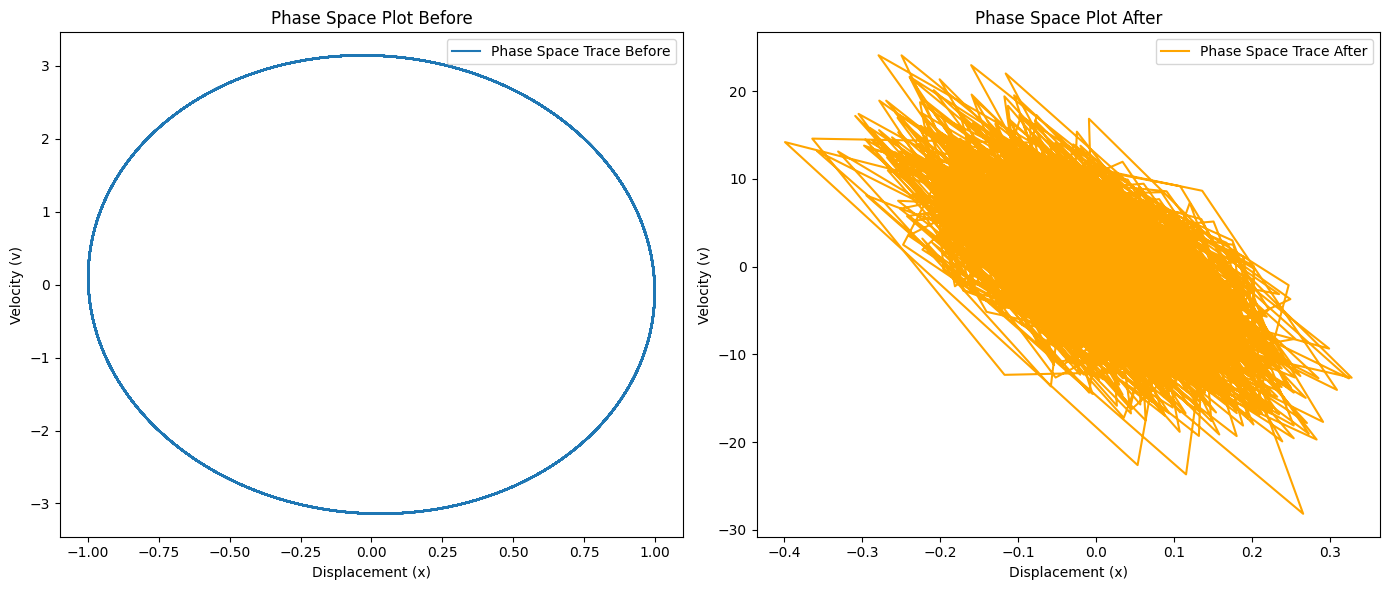

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the original signal
time = np.linspace(0, 100, 5000)
signal_before = np.sin(2 * np.pi * 0.5 * time) 

# Apply a moving average to the signal
window_size = 2000
signal_after = np.convolve(signal_before, np.ones(window_size) / window_size, mode='valid')+ np.random.normal(0, 0.1, size=3001)

# Calculate the phase space (displacement and velocity)
def calculate_phase_space(signal, dt):
    displacement = signal[:-1]
    velocity = np.diff(signal) / dt
    return displacement, velocity

dt = time[1] - time[0]
displacement_before, velocity_before = calculate_phase_space(signal_before, dt)
displacement_after, velocity_after = calculate_phase_space(signal_after, dt)

# Plot the phase space
plt.figure(figsize=(14, 6))

# Plot original phase space
plt.subplot(1, 2, 1)
plt.plot(displacement_before, velocity_before, label='Phase Space Trace Before')
plt.title('Phase Space Plot Before')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.legend()

# Plot after phase space
plt.subplot(1, 2, 2)
plt.plot(displacement_after, velocity_after, label='Phase Space Trace After', color='orange')
plt.title('Phase Space Plot After')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.legend()

plt.tight_layout()
plt.show()


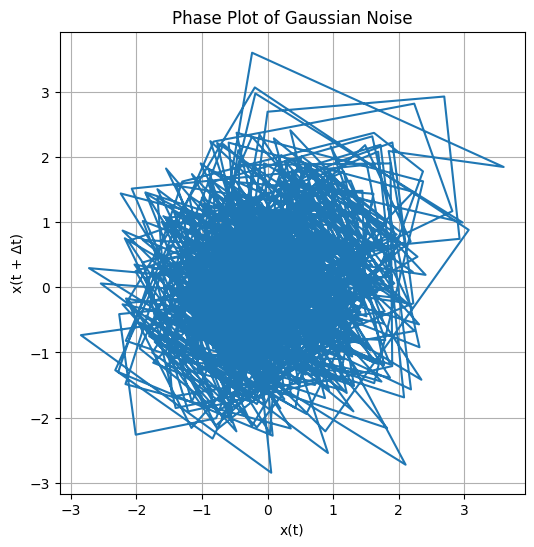

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Gaussian noise
length = 1000
sigma = 1.0
gaussian_noise = np.random.normal(0, sigma, length)

# Create a phase plot: x(t) vs x(t + Δt)
delta_t = 1  # Time lag
x_t = gaussian_noise[:-delta_t]
x_t_plus_delta = gaussian_noise[delta_t:]

# Plot the phase plot
plt.figure(figsize=(6, 6))
plt.plot(x_t, x_t_plus_delta)
plt.xlabel('x(t)')
plt.ylabel('x(t + Δt)')
plt.title('Phase Plot of Gaussian Noise')
plt.grid(True)
plt.show()
